In [1]:
import pandas as pd

data = pd.read_csv('ma030000.csv',
                   encoding="shift-jis",
                   header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,人口,出生数,死亡数,（再掲）,NaN,自 然,死産数,NaN,NaN,周産期死亡数,NaN,NaN,婚姻件数,離婚件数
1,NaN,NaN,NaN,NaN,乳児死亡数,新生児,増減数,総数,自然死産,人工死産,総数,22週以後,早期新生児,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,死亡数,NaN,NaN,NaN,NaN,NaN,の死産数,死亡数,NaN,NaN
3,全 国,123398962,840835,1372755,1512,704,-531920,17278,8188,9090,2664,2112,552,525507,193253
4,01 北海道,5188441,29523,65078,59,25,-35555,728,304,424,92,75,17,20904,9070


In [2]:
data = pd.read_csv('ma030000.csv',
                   encoding="shift-jis",
                   skiprows=4,
                   header=None)
data.drop(data.tail(21).index, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,01 北海道,5188441,29523,65078,59,25,-35555,728,304,424,92,75,17,20904,9070
1,02 青森県,1232227,6837,17905,18,15,-11068,145,87,58,32,17,15,4032,1915
2,03 岩手県,1203203,6718,17204,8,3,-10486,150,90,60,21,19,2,3918,1679
3,04 宮城県,2280203,14480,24632,27,15,-10152,311,141,170,56,41,15,8921,3553
4,05 秋田県,955659,4499,15379,9,4,-10880,98,63,35,18,15,3,2686,1213


In [3]:
col_data = pd.read_csv('ma030000.csv',
                       encoding="shift-jis",
                       nrows=3,
                       header=None)

col_head = col_data.head(1)
col_head = col_head.fillna(method="ffill", axis=1)

col_data.iloc[0] = col_head.iloc[0]

cols=[]
for i in col_data.columns:
    col = ''.join(list(col_data[i].dropna()))
    cols.append(col)

cols[0] = '都道府県'

data.columns = cols
data.head()

,都道府県,人口,出生数,死亡数,（再掲）乳児死亡数,（再掲）新生児死亡数,自 然増減数,死産数総数,死産数自然死産,死産数人工死産,周産期死亡数総数,周産期死亡数22週以後の死産数,周産期死亡数早期新生児死亡数,婚姻件数,離婚件数
0,01 北海道,5188441,29523,65078,59,25,-35555,728,304,424,92,75,17,20904,9070
1,02 青森県,1232227,6837,17905,18,15,-11068,145,87,58,32,17,15,4032,1915
2,03 岩手県,1203203,6718,17204,8,3,-10486,150,90,60,21,19,2,3918,1679
3,04 宮城県,2280203,14480,24632,27,15,-10152,311,141,170,56,41,15,8921,3553
4,05 秋田県,955659,4499,15379,9,4,-10880,98,63,35,18,15,3,2686,1213


In [5]:
import numpy as np

data.replace('-', np.nan, inplace=True)
data.replace('・', np.nan, inplace=True)

data.iloc[:, 2:] = data.iloc[:, 2:].astype(float)
data.dtypes

C:\Users\mh\AppData\Local\Temp\ipykernel_7132\3973701806.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 2:] = data.iloc[:, 2:].astype(float)


都道府県                object
人口                  object
出生数                float64
死亡数                float64
（再掲）乳児死亡数          float64
（再掲）新生児死亡数         float64
自　然増減数             float64
死産数総数              float64
死産数自然死産            float64
死産数人工死産            float64
周産期死亡数総数           float64
周産期死亡数22週以後の死産数    float64
周産期死亡数早期新生児死亡数     float64
婚姻件数               float64
離婚件数               float64
dtype: object

<BarContainer object of 49 artists>

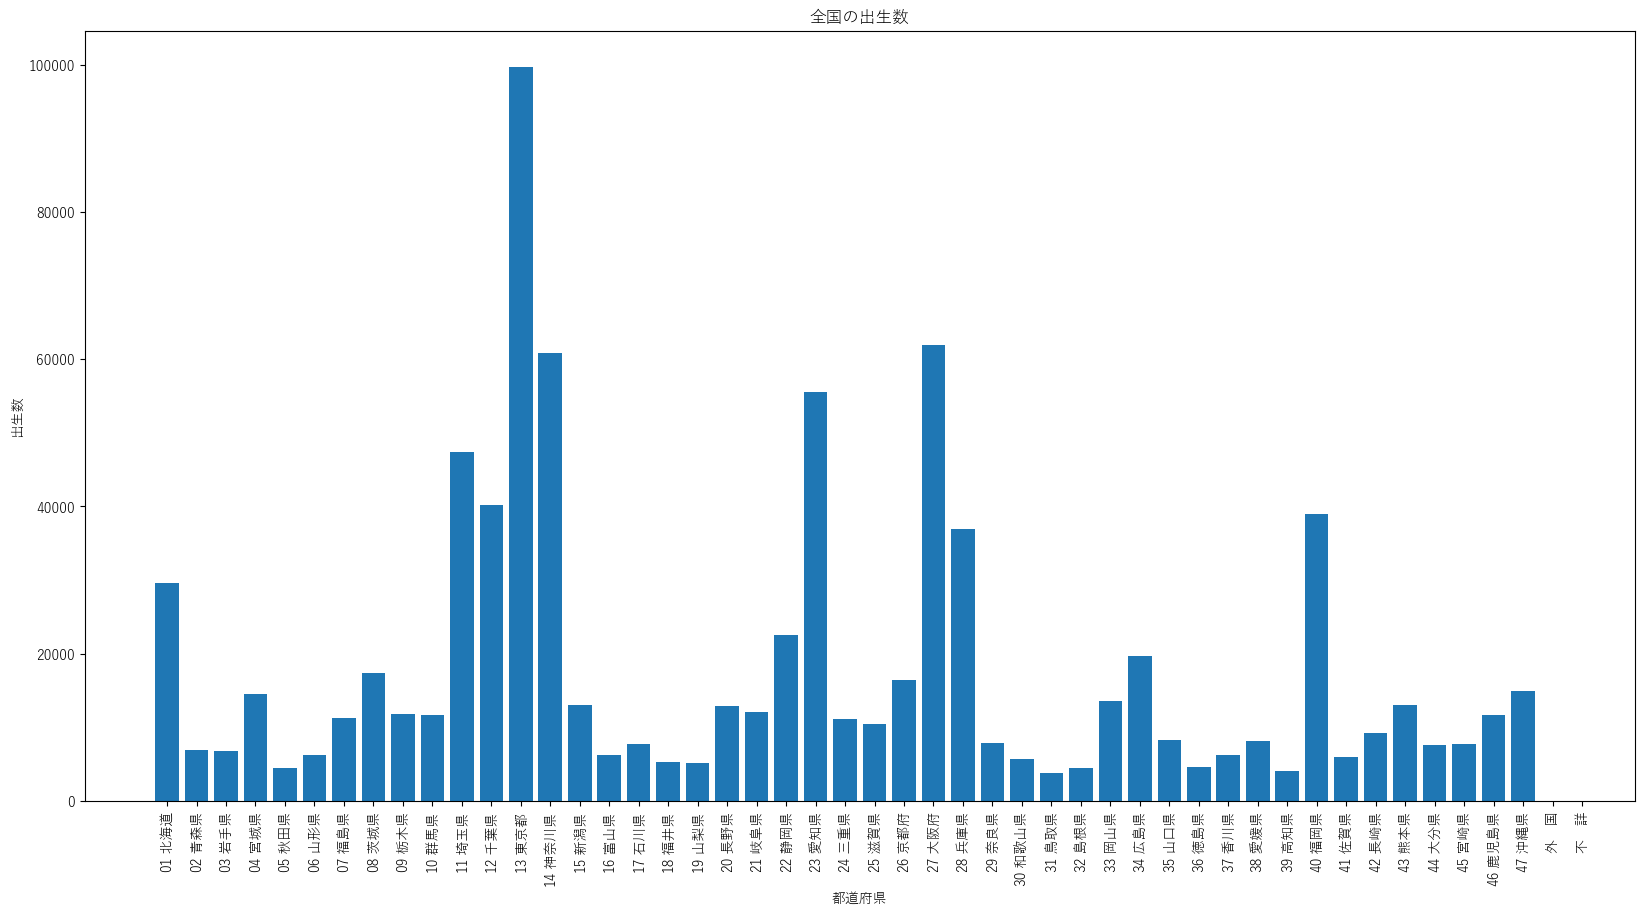

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Yu Gothic', 'Meiryo']

plt.rcParams['figure.figsize'] = (20, 10)

x = data['都道府県']
y = data['出生数']

plt.title('全国の出生数')
plt.xlabel('都道府県')
plt.ylabel('出生数')

plt.xticks(rotation=90)

plt.bar(x, y)



In [9]:
data.to_csv('demographics.csv',
            index=False,
            encoding='utf_8_sig')

<BarContainer object of 49 artists>

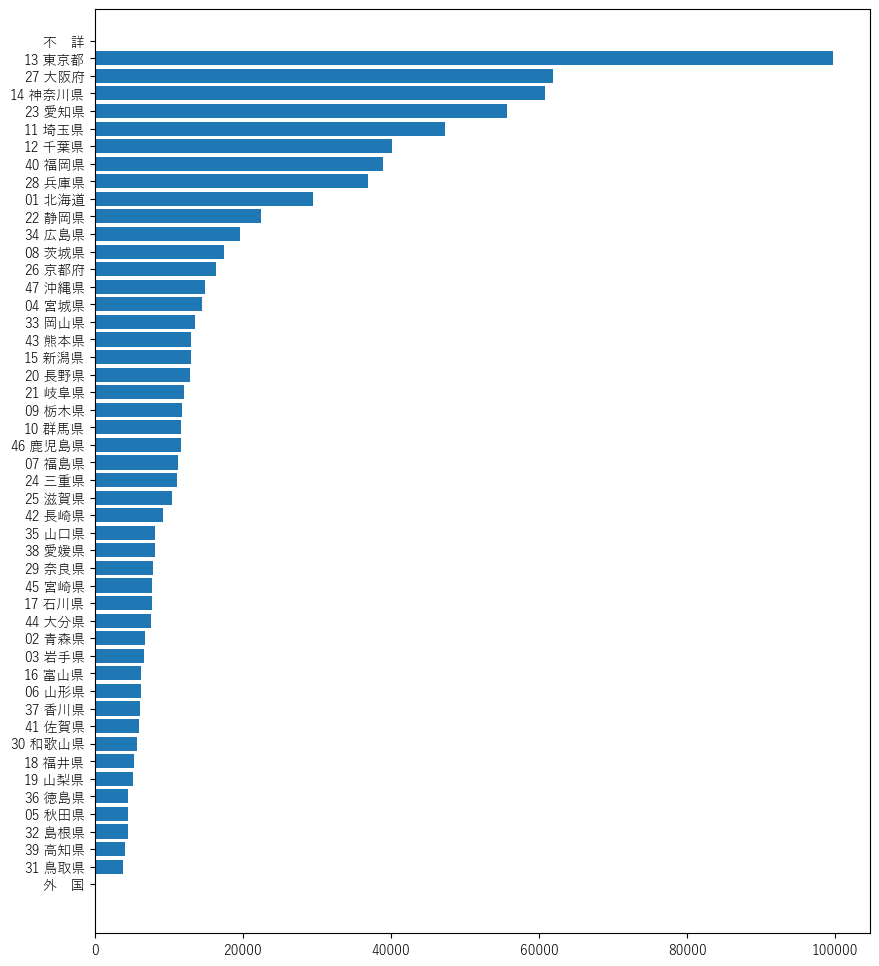

In [10]:
demo_data = pd.read_csv('demographics.csv')
demo_data = demo_data.sort_values('出生数', ascending=True)

plt.rcParams['figure.figsize'] = (10, 12)

x = demo_data['都道府県']
y = demo_data['出生数']

plt.barh(x, y)